# An Empirical Comparison of Supervised and Self-Supervised Learning

In [5]:
import tqdm
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

from sklearn.svm import SVC
from sklearn.manifold import TSNE

from train import train_encoder, train_ConvNet, TrainArgs
from test import encode_data, plot_tsne, test_conv

from torch.utils.data import Subset

In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Baseline: convolutional neural network

In [7]:
conv_args = TrainArgs(batchsize = 10)

In [8]:
ConvNet, conv_losses = train_ConvNet(conv_args)

Files already downloaded and verified
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.302
[epoch: 0, i:   999] avg mini-batch loss: 2.295
[epoch: 0, i:  1499] avg mini-batch loss: 2.249
[epoch: 0, i:  1999] avg mini-batch loss: 2.155
[epoch: 0, i:  2499] avg mini-batch loss: 2.087
[epoch: 0, i:  2999] avg mini-batch loss: 2.003
[epoch: 0, i:  3499] avg mini-batch loss: 1.939
[epoch: 0, i:  3999] avg mini-batch loss: 1.906
[epoch: 0, i:  4499] avg mini-batch loss: 1.857
[epoch: 0, i:  4999] avg mini-batch loss: 1.823
[epoch: 1, i:   499] avg mini-batch loss: 1.723
[epoch: 1, i:   999] avg mini-batch loss: 1.670
[epoch: 1, i:  1499] avg mini-batch loss: 1.637
[epoch: 1, i:  1999] avg mini-batch loss: 1.602
[epoch: 1, i:  2499] avg mini-batch loss: 1.580
[epoch: 1, i:  2999] avg mini-batch loss: 1.555
[epoch: 1, i:  3499] avg mini-batch loss: 1.560
[epoch: 1, i:  3999] avg mini-batch loss: 1.531
[epoch: 1, i:  4499] avg mini-batch loss: 1.498
[epoch: 1, i:  4999] avg mini-batc

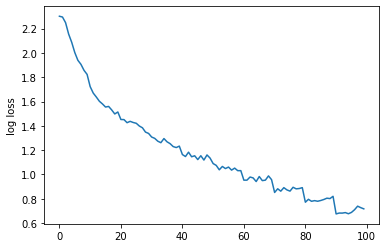

In [9]:
plt.plot(conv_losses);
plt.ylabel('log loss');

In [10]:
print(f'Baseline accuracy of the convolutional model is {test_conv(ConvNet)*100} %')

Files already downloaded and verified
Baseline accuracy of the convolutional model is 65.38000000000001 %


## Momentum Contrast

### Pre-Training the Encoder

In [11]:
encoder_args = TrainArgs(epochs = 20)

In [12]:
encoder, enc_losses = train_encoder(encoder_args)

Files already downloaded and verified
Files already downloaded and verified
Train Epoch: 1 	Loss: 0.035850
Train Epoch: 2 	Loss: 0.014127
Train Epoch: 3 	Loss: 0.007404
Train Epoch: 4 	Loss: 0.005052
Train Epoch: 5 	Loss: 0.004024
Train Epoch: 6 	Loss: 0.003491
Train Epoch: 7 	Loss: 0.003135
Train Epoch: 8 	Loss: 0.002888
Train Epoch: 9 	Loss: 0.002715
Train Epoch: 10 	Loss: 0.002545
Train Epoch: 11 	Loss: 0.002401
Train Epoch: 12 	Loss: 0.002327
Train Epoch: 13 	Loss: 0.002204
Train Epoch: 14 	Loss: 0.002132
Train Epoch: 15 	Loss: 0.002067
Train Epoch: 16 	Loss: 0.001970
Train Epoch: 17 	Loss: 0.001932
Train Epoch: 18 	Loss: 0.001853
Train Epoch: 19 	Loss: 0.001817
Train Epoch: 20 	Loss: 0.001791


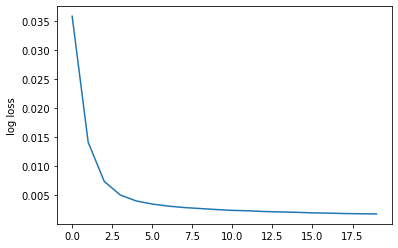

In [13]:
plt.plot(enc_losses);
plt.ylabel('log loss');

### Visualizing Embeddings

To do:
1. Implement multiple training ratios
2. Hyperparameter tuning?
3. Plot the loss functions

In [14]:
data, targets = encode_data()

Files already downloaded and verified


100%|██████████| 10000/10000 [01:45<00:00, 94.65it/s]


In [15]:
ret = TSNE(n_components=2, random_state=0, n_jobs=8).fit_transform(data)

Files already downloaded and verified


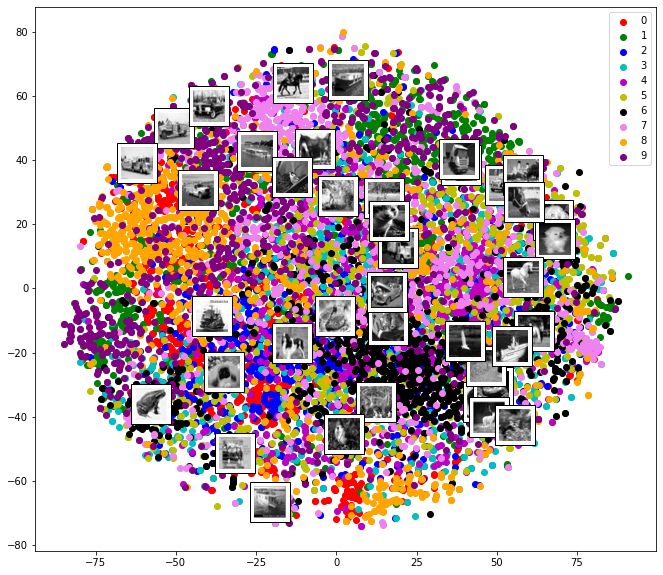

In [16]:
plot_tsne(targets, ret)

### Training SVM on freezed features

In [17]:
X_train, y_train = encode_data(train=True)
X_test, y_test = encode_data(train=False)

Files already downloaded and verified


100%|██████████| 50000/50000 [09:06<00:00, 91.54it/s]


Files already downloaded and verified


100%|██████████| 10000/10000 [01:51<00:00, 90.08it/s]


In [18]:
svm = SVC(C = 100,  gamma='scale')
svm.fit(X_train, y_train)

SVC(C=100)

In [19]:
svm.score(X_test, y_test)

0.6265

### Multiple Runs

In [20]:
# subsample so things run faster
X_train, y_train = encode_data(train=True, subsample = True)
X_test, y_test = encode_data(train=False, subsample = True)

Files already downloaded and verified


100%|██████████| 5000/5000 [00:55<00:00, 89.53it/s]


Files already downloaded and verified


100%|██████████| 1000/1000 [00:11<00:00, 89.96it/s]


In [21]:
conv_args = TrainArgs(batchsize = 10, epochs = 5)

In [22]:
n = 3
conv_errors = []
svm_errors = []
for i in range(n):
    ConvNet, conv_losses = train_ConvNet(conv_args, subsample=True)
    conv_errors.append(test_conv(ConvNet, subsample=True)*100)
    
    svm = SVC(C = 100,  gamma='scale')
    svm.fit(X_train, y_train)   
    svm_errors.append(svm.score(X_test, y_test))

Files already downloaded and verified
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.302
[epoch: 1, i:   499] avg mini-batch loss: 2.302
[epoch: 2, i:   499] avg mini-batch loss: 2.301
[epoch: 3, i:   499] avg mini-batch loss: 2.300
[epoch: 4, i:   499] avg mini-batch loss: 2.299
Files already downloaded and verified
Files already downloaded and verified
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.301
[epoch: 1, i:   499] avg mini-batch loss: 2.296
[epoch: 2, i:   499] avg mini-batch loss: 2.283
[epoch: 3, i:   499] avg mini-batch loss: 2.242
[epoch: 4, i:   499] avg mini-batch loss: 2.176
Files already downloaded and verified
Files already downloaded and verified
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.302
[epoch: 1, i:   499] avg mini-batch loss: 2.300
[epoch: 2, i:   499] avg mini-batch loss: 2.295
[epoch: 3, i:   499] avg mini-batch loss: 2.281
[epoch: 4, i:   499] avg mini-batch loss: 2.245
Files already downloaded and verified


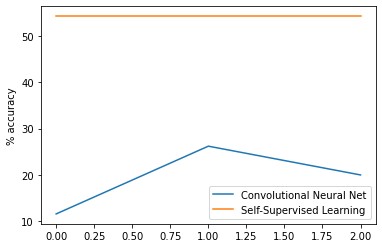

In [23]:
plt.plot(np.array(conv_errors), label="Convolutional Neural Net")
plt.plot(np.array(svm_errors)*100, label="Self-Supervised Learning")
plt.legend()
plt.ylabel('% accuracy')
plt.savefig('./results/comparison.png')

In [24]:
conv_errors

[11.600000000000001, 26.200000000000003, 20.0]

In [25]:
svm_errors

[0.542, 0.542, 0.542]

In [26]:
conv_errors

[11.600000000000001, 26.200000000000003, 20.0]